### Explanation
* eps: es el épsilon, que es la máxima distancia que puede haber entre dos clusters, este parámetro lo que hace es cambiar la función de densidad del algoritmo, a más distancia, menos cluster habrá. Su valor dependerá de los datos de tu dataset.
* min_samples: el número mínimo de puntos necesarios que tiene que tener otro punto alrededor para que sea considerado componente (lo que en el K-means son los centroides).
* metric: la métrica que el algoritmo usa para calcular la distancia y ver que puntos son vecinos unos de otros. Podemos usar “euclidean” o una matriz de distancias precalculada por nosotros con el algoritmo que queramos.
* algorithm: es el algoritmo que se encargará de computar las distancias y encontrar vecinos cercanos, podemos seleccionar una de las siguientes opciones, “brute”, “kd_tree”, “ball_tree”, “auto”. Si quieres entender que significan cada una de estas opciones, puedes verlo en este otro artículo sobre el algoritmo Vecinos Cercanos.
* leaf_size: si escoges un algoritmo de distancias basado en árboles, puedes fijar el número máximo de hojas

### Tipe of points
* Core (Núcleo) : el nº de vecinos >= min_samples dentro de eps a su alrededor
* Boundary(Alcanzable o border) : nº de vecinos < min_samples dentro de eps & está dentro del eps de otro punto core
* Noise (Ruido): Todo punto que no forma parte de 1 cluster (core) ni está dentro de eps

# Está prueba es el equivalente a KMEAN_prueba2 pero empleando DBSCAN

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import preprocessing

### Read CSV file and obtain the location

In [2]:
# Read CSV file
df1 = pd.read_csv("DIT_Channel.csv")

# Make a copy
df = df1.copy()

# Print result
df

,channel_id,monitor_radio_id,posted_data_id,location_id,channel,transmission_rate,noise,contention,frames_total,frames_data,...,survey_dump_transmit_time,rss_40,rss_50,rss_60,rss_70,rss_80,rss_90,mean_interframe,var_interframe,created_at
0,27366122,1122,43469381,371,11,1.0,0.0,1.1703,3848,72,...,NaN,0,0,0,2,13,2,5.584,69.621,2018-05-02 00:05:56
1,27366333,1122,43469601,371,5,1.0,0.0,1.0099,849,30,...,NaN,0,0,0,0,4,0,33.601,572.944,2018-05-02 00:10:07
2,27366397,1122,43469681,371,7,1.0,0.0,1.0024,442,3,...,NaN,0,0,0,0,3,0,66.456,2460.919,2018-05-02 00:11:17
3,27366427,1122,43469711,371,8,1.0,0.0,1.0218,908,51,...,NaN,0,0,0,0,2,0,31.350,917.026,2018-05-02 00:11:52
4,27367632,1122,43471051,371,8,1.0,0.0,1.0135,674,26,...,NaN,0,0,0,0,2,0,42.508,1343.347,2018-05-02 00:35:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435004,29294976,1160,45593411,378,9,10.8,0.0,1.0853,8413,4265,...,NaN,2,0,0,4,9,0,3.851,61.973,2018-05-30 10:54:47
435005,29294999,1160,45593446,378,10,1.0,0.0,1.0136,1770,243,...,NaN,0,0,0,0,13,1,18.503,563.282,2018-05-30 10:55:24
435006,29295026,1160,45593475,378,11,1.0,0.0,1.0506,3278,246,...,NaN,0,0,0,0,16,7,7.582,113.351,2018-05-30 10:56:00
435007,29295051,1160,45593500,378,12,1.0,0.0,1.0587,1649,388,...,NaN,0,0,0,0,14,0,16.983,563.543,2018-05-30 10:56:36


### Time selection
* For example: Mornings of the days 2018-05-21, 2018-05-22, 2018-05-23, 2018-05-24 and 2018-05-25

In [3]:
# Filter data(Mornings: 7h-15h)
df = df[((df['created_at'] > '2018-05-21 07:00:00') & (df['created_at'] <= '2018-05-21 15:00:00')) |
((df['created_at'] > '2018-05-22 07:00:00') & (df['created_at'] <= '2018-05-22 15:00:00')) |
((df['created_at'] > '2018-05-23 07:00:00') & (df['created_at'] <= '2018-05-23 15:00:00')) |
((df['created_at'] > '2018-05-24 07:00:00') & (df['created_at'] <= '2018-05-24 15:00:00')) |
((df['created_at'] > '2018-05-25 07:00:00') & (df['created_at'] <= '2018-05-25 15:00:00'))]

# Print result
df

,channel_id,monitor_radio_id,posted_data_id,location_id,channel,transmission_rate,noise,contention,frames_total,frames_data,...,survey_dump_transmit_time,rss_40,rss_50,rss_60,rss_70,rss_80,rss_90,mean_interframe,var_interframe,created_at
16485,28703611,1122,44949990,371,13,0.0,0.0,1.0172,481,0,...,NaN,0,0,0,2,4,2,61.568,5380.747,2018-05-21 07:00:22
16486,28703646,1122,44950035,371,1,3.3,0.0,1.0703,1924,165,...,NaN,0,0,0,1,11,3,14.531,448.625,2018-05-21 07:00:57
16487,28703681,1122,44950071,371,2,1.0,0.0,1.0126,1133,19,...,NaN,0,0,0,3,6,0,24.611,551.214,2018-05-21 07:01:32
16488,28703709,1122,44950100,371,3,1.0,0.0,1.0060,1209,572,...,NaN,0,0,0,1,3,0,23.233,789.327,2018-05-21 07:02:07
16489,28703745,1122,44950138,371,4,1.0,0.0,1.0123,1156,86,...,NaN,0,0,0,0,4,0,24.451,883.831,2018-05-21 07:02:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427307,29021254,1160,45295628,378,9,7.4,0.0,1.0268,2803,508,...,NaN,2,0,0,5,10,0,9.868,173.649,2018-05-25 14:57:12
427308,29021277,1160,45295651,378,10,1.0,0.0,1.0584,2089,43,...,NaN,0,0,0,3,15,2,12.261,436.213,2018-05-25 14:57:48
427309,29021302,1160,45295677,378,11,1.0,0.0,1.0897,3203,183,...,NaN,0,0,0,2,16,3,7.321,124.883,2018-05-25 14:58:23
427310,29021330,1160,45295705,378,12,1.0,0.0,1.0619,1977,128,...,NaN,0,0,0,5,8,1,15.395,509.285,2018-05-25 14:58:59


### Drop columns

In [4]:
# Drop data of data frame
df.drop(labels=["channel_id","monitor_radio_id","posted_data_id","location_id","channel","transmission_rate","noise","contention","frames_total",
"frames_data","frames_mgnt","frames_ctrl","frames_fail","frames_fail_bad","bw_busy_native","bw_busy_qc_native","bw_busy_qc_ext","bw_idle","bw_fail",
"bw_access_max_ap","bw_access_avg_ap","bw_free_calculated","bw_data","bw_mgnt","bw_ctrl","bw_ap","bw_client","bw_adhoc","bw_mesh",
"bw_unassociated_clients", "infrastructure_aps","infrastructure_clients","unassociated_clients","adhoc_networks","adhoc_devices","mesh_networks",
"mesh_devices","hidden_devices","hidden_aps","hidden_clients","hidden_adhoc_devices","hidden_mesh_devices","clients_channel","aps_channel",
"aps_rss_combined","aps_rss_factor","survey_dump_noise","survey_dump_active_time","survey_dump_busy_time","survey_dump_receive_time",
"survey_dump_transmit_time","rss_40","rss_50","rss_60","rss_70","rss_80","rss_90","mean_interframe","var_interframe"], axis=1, inplace=True)

# Print results
df

C:\Users\alvar\AppData\Local\Temp\ipykernel_16688\1013312271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(labels=["channel_id","monitor_radio_id","posted_data_id","location_id","channel","transmission_rate","noise","contention","frames_total",


,bw_busy,total_devices,created_at
16485,0.0267,18,2018-05-21 07:00:22
16486,0.1119,26,2018-05-21 07:00:57
16487,0.0788,17,2018-05-21 07:01:32
16488,0.0768,11,2018-05-21 07:02:07
16489,0.0741,16,2018-05-21 07:02:42
...,...,...,...
427307,0.1278,44,2018-05-25 14:57:12
427308,0.1573,50,2018-05-25 14:57:48
427309,0.2360,43,2018-05-25 14:58:23
427310,0.1243,40,2018-05-25 14:58:59


### Save timeStamp

In [5]:
# Save TimeStamp
dates = df["created_at"]

# Drop categorical data
df.drop(labels=['created_at'], axis=1, inplace=True)

# Print result
df

C:\Users\alvar\AppData\Local\Temp\ipykernel_16688\1753502878.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(labels=['created_at'], axis=1, inplace=True)


,bw_busy,total_devices
16485,0.0267,18
16486,0.1119,26
16487,0.0788,17
16488,0.0768,11
16489,0.0741,16
...,...,...
427307,0.1278,44
427308,0.1573,50
427309,0.2360,43
427310,0.1243,40


### DBSCAN
* For random eps value and min_samples value 

C:\Users\alvar\AppData\Local\Temp\ipykernel_16688\3407781144.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = cluster


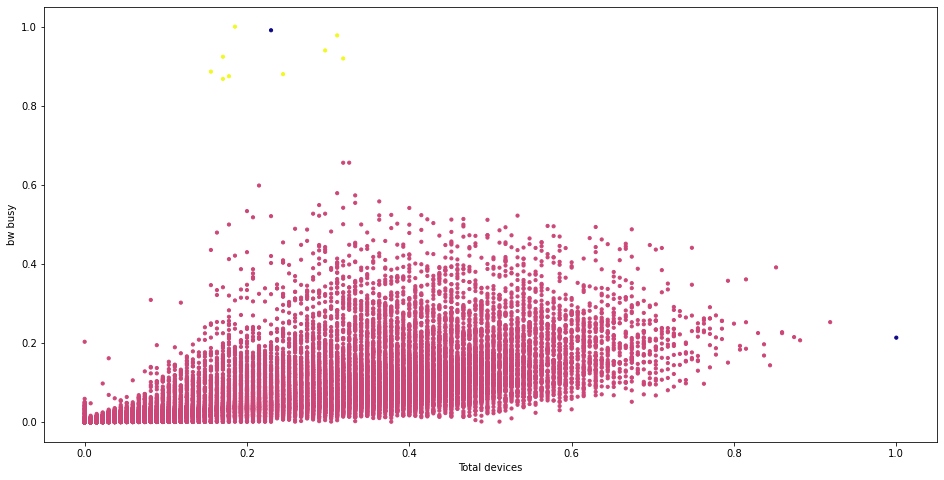

In [6]:
# Normalize
min_max_scaler = preprocessing.MinMaxScaler()
df_escalado = min_max_scaler.fit_transform(df)
df_escalado = pd.DataFrame(df_escalado)
df_escalado = df_escalado.rename(columns= {0 : 'bw_busy', 1: 'total_devices'})

# DBSCAN
dbscan = DBSCAN(eps= 0.08, min_samples= 4).fit(df_escalado)
cluster = dbscan.fit_predict(df_escalado)

# Add to dataFrame
df['Cluster'] = cluster

# Asign x and y
x = df_escalado['total_devices'].values # total_devices
y = df_escalado['bw_busy'].values # bw_busy

# Plot the clusters
plt.figure(figsize=(16,8))
plt.scatter(x, y, c = cluster, cmap= "plasma", s=10) # plotting the clusters ## XQ CON df.iloc FUNCIONA PERO CON df NO?
plt.xlabel("Total devices") # X-axis label
plt.ylabel("bw busy") # Y-axis label
plt.show() # showing the plot


### Determining the correct epsilon
* The epsilon and min_samples are random values
* To determine the correct epsilon --> elbow method
* Determine a number of min_sample:
    * If the dataset has two dimensions, use the min sample per cluster as 4. (Ester et al., 1996)
    * If the data has more than two dimensions, the min sample per cluster should be: Min_sample(MinPoints) = 2 * Data dimension. (Sander et al., 1998)

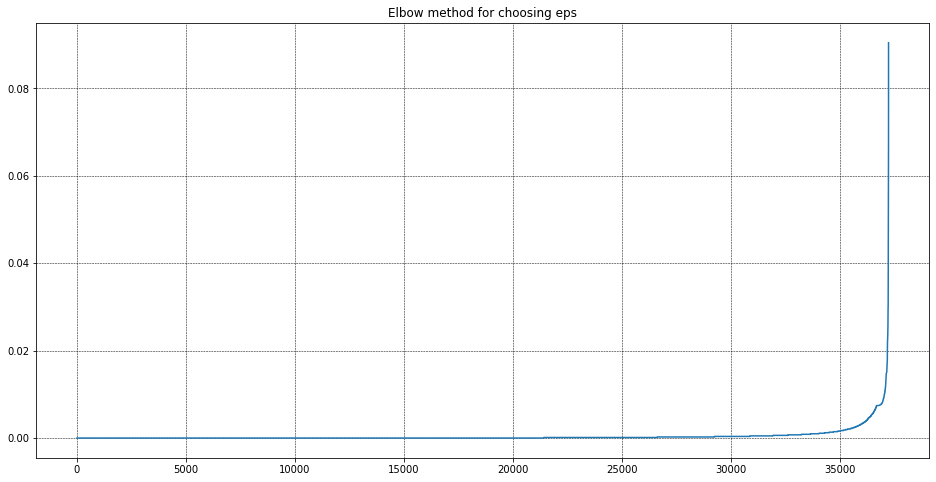

In [7]:
from sklearn.neighbors import NearestNeighbors
# min_samples
n = 4

# Calculate avg. distance between each point in the data set
neighbours = NearestNeighbors(n_neighbors=n+1)
neighbors_fit = neighbours.fit(df_escalado)
distances, indices = neighbors_fit.kneighbors(df_escalado)
distances = np.sort(distances[:,1], axis=0) #To obtain the distance of the sorted distances

# Plot
plt.figure(figsize=(16,8))
plt.title("Elbow method for choosing eps")
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.plot(distances)

### Expand the image
* The limit of x axis --> 37000 and 37250
* The limit of y axis --> 0 and 0.08

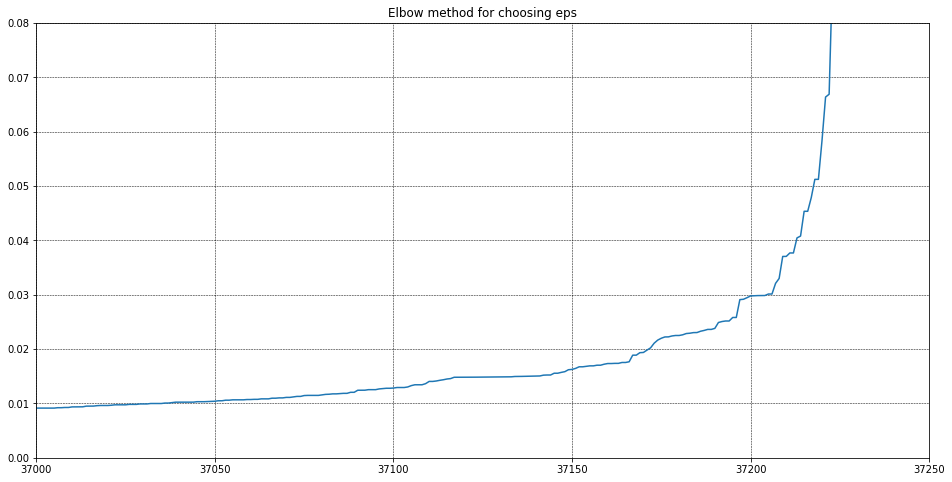

In [8]:
# Calculate avg. distance between each point in the data set
neighbours = NearestNeighbors(n_neighbors=n+1)
neighbors_fit = neighbours.fit(df_escalado)
distances, indices = neighbors_fit.kneighbors(df_escalado)
distances = np.sort(distances[:,1], axis=0) #To obtain the distance of the sorted distances

# Plot
plt.figure(figsize=(16,8))
plt.title("Elbow method for choosing eps")
plt.ylim(0, 0.08)
plt.xlim(37000, 37250)
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.plot(distances)

### Compare different epsilons
* eps = 0.008
* eps = 0.08 

C:\Users\alvar\AppData\Local\Temp\ipykernel_16688\2162685377.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = cluster


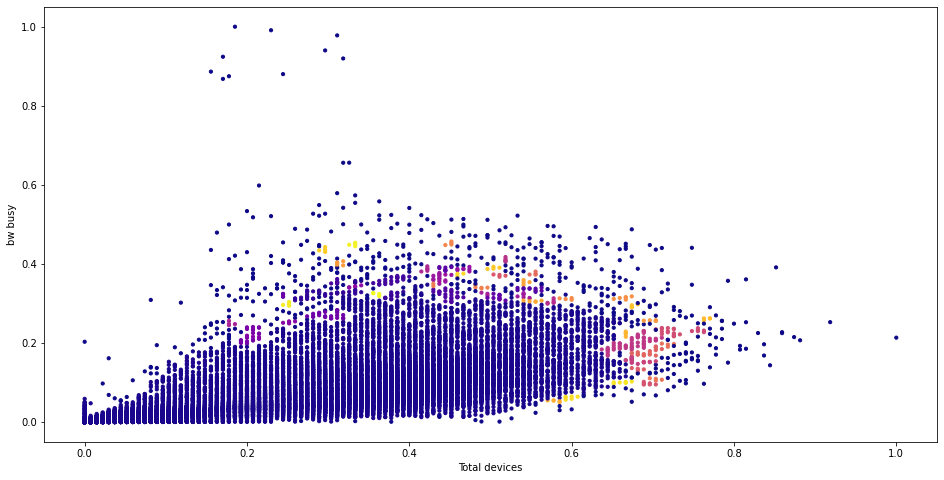

In [9]:
# 1st try with eps = 0.008
# Normalize
min_max_scaler = preprocessing.MinMaxScaler()
df_escalado = min_max_scaler.fit_transform(df)
df_escalado = pd.DataFrame(df_escalado)
df_escalado = df_escalado.rename(columns= {0 : 'bw_busy', 1: 'total_devices'})

# Epsilon 
e = 0.008

# DBSCAN
dbscan = DBSCAN(eps= e, min_samples= n)
cluster = dbscan.fit_predict(df_escalado)

# Add to dataFrame
df['Cluster'] = cluster

# Asign x and y
x = df_escalado['total_devices'].values # total_devices
y = df_escalado['bw_busy'].values # bw_busy

# Plot the clusters
plt.figure(figsize=(16,8))
plt.scatter(x, y, c = cluster, cmap= "plasma", s=10) # plotting the clusters ## XQ CON df.iloc FUNCIONA PERO CON df NO?
plt.xlabel("Total devices") # X-axis label
plt.ylabel("bw busy") # Y-axis label
plt.show() # showing the plot


### Count of cluster

In [10]:
copy = pd.DataFrame()
copy['bw_busy']=df['bw_busy'].values
copy['total_devices']=df['total_devices'].values
copy['label'] = cluster
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,cantidad
label,
-1,559
0,36173
1,16
2,4
3,36
...,...
56,6
57,7
58,4


C:\Users\alvar\AppData\Local\Temp\ipykernel_16688\109015050.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = cluster


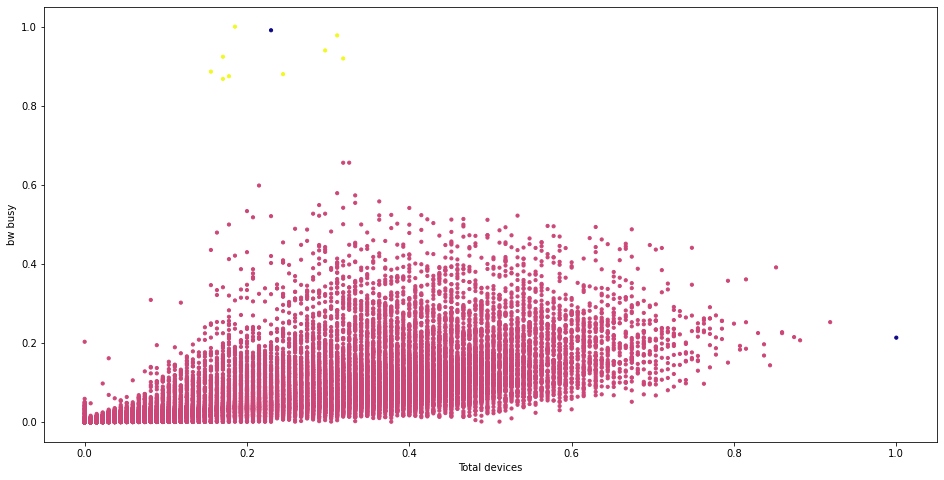

In [11]:
# 2nd try with eps = 0.08
# Normalize
min_max_scaler = preprocessing.MinMaxScaler()
df_escalado = min_max_scaler.fit_transform(df)
df_escalado = pd.DataFrame(df_escalado)
df_escalado = df_escalado.rename(columns= {0 : 'bw_busy', 1: 'total_devices'})

# Epsilon 
e = 0.08

# DBSCAN
dbscan = DBSCAN(eps= e, min_samples= n)
cluster = dbscan.fit_predict(df_escalado)

# Add to dataFrame
df['Cluster'] = cluster

# Asign x and y
x = df_escalado['total_devices'].values # total_devices
y = df_escalado['bw_busy'].values # bw_busy

# Plot the clusters
plt.figure(figsize=(16,8))
plt.scatter(x, y, c = cluster, cmap= "plasma", s=10) # plotting the clusters ## XQ CON df.iloc FUNCIONA PERO CON df NO?
plt.xlabel("Total devices") # X-axis label
plt.ylabel("bw busy") # Y-axis label
plt.show() # showing the plot

### Count of cluster

In [12]:
copy = pd.DataFrame()
copy['bw_busy']=df['bw_busy'].values
copy['total_devices']=df['total_devices'].values
copy['label'] = cluster
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,cantidad
label,
-1,2
0,37213
1,9


### Clusters
* Clúster -1: blue dots, sparse values ​​that DBSCAN interprets as outliers (noise).
* Clúster 0: pink dots, they are the densest and therefore normal data of the curve.
* Clúster 1: yellow dots, is a small group that does not belong to cluster 0 but they do not have to be outliers (noise).

### 